In [1]:
!kaggle datasets download -d gregorut/videogamesales

Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales
License(s): unknown
  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 88.3MB/s]


In [2]:
from google.colab import files
import zipfile
import os

filename = r'/content/videogamesales.zip'

extract_dir = r'/content/aya'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

Files extracted to /content/aya


In [3]:
import pandas as pd
df = pd.read_csv('/content/aya/vgsales.csv')
df.head()
#

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum() / len(df) * 100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [9]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(region_sales)


NA_Sales        4327.65
EU_Sales        2406.69
JP_Sales        1284.27
Other_Sales      788.91
Global_Sales    8811.97
dtype: float64


In [10]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].max()
print(region_sales)


NA_Sales        41.49
EU_Sales        29.02
JP_Sales        10.22
Other_Sales     10.57
Global_Sales    82.74
dtype: float64


In [11]:
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
print(top_games)


                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


In [12]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print(platform_sales)


Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64


In [13]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(genre_sales)


Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64


In [14]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False)
print(sales_by_year)

Year
2008.0    678.90
2009.0    667.30
2007.0    609.92
2010.0    600.29
2006.0    521.04
2011.0    515.80
2005.0    458.51
2004.0    414.01
2002.0    395.52
2013.0    368.11
2012.0    363.49
2003.0    357.85
2014.0    337.03
2001.0    331.47
2015.0    264.44
1998.0    256.47
1999.0    251.27
2000.0    201.56
1997.0    200.98
1996.0    199.15
1995.0     88.11
1994.0     79.17
1992.0     76.16
1989.0     73.45
2016.0     70.90
1985.0     53.94
1984.0     50.36
1990.0     49.39
1988.0     47.22
1993.0     45.98
1986.0     37.07
1981.0     35.77
1991.0     32.23
1982.0     28.86
1987.0     21.74
1983.0     16.79
1980.0     11.38
2020.0      0.29
2017.0      0.05
Name: Global_Sales, dtype: float64


In [15]:
sales_publisher = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
print(sales_publisher)

Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
                                ...   
Epic Games                        0.01
Paradox Development               0.01
Rain Games                        0.01
Ascaron Entertainment             0.01
Commseed                          0.01
Name: Global_Sales, Length: 576, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

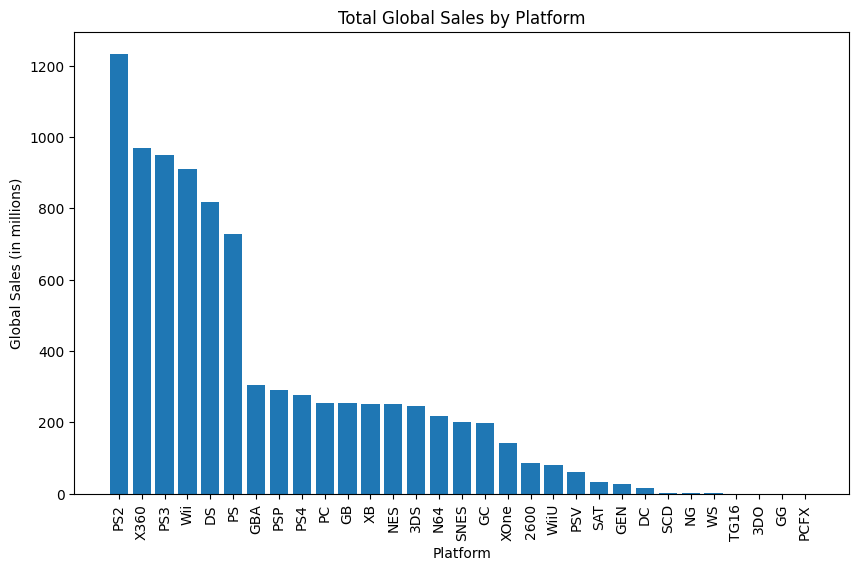

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(platform_sales.index , platform_sales.values)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

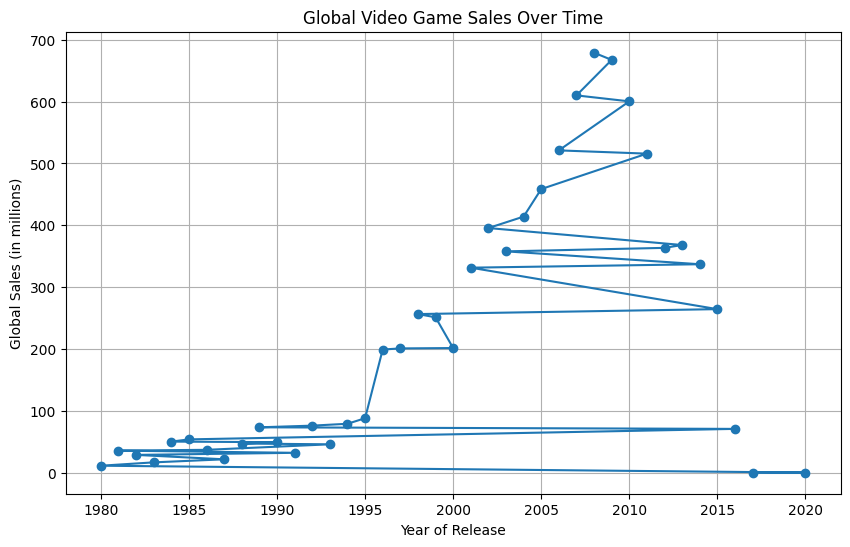

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o')
plt.title('Global Video Game Sales Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

<ipython-input-19-d724c73f86ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='coolwarm')


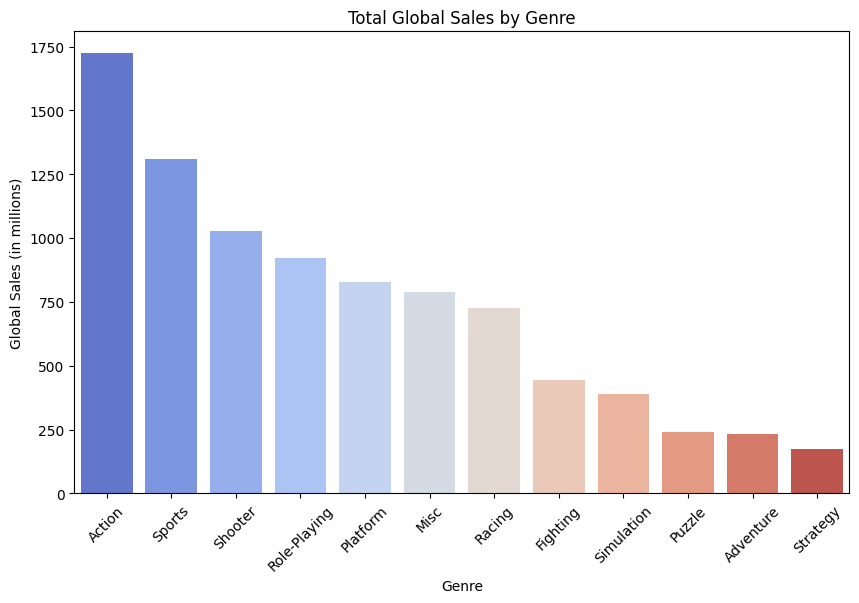

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='coolwarm')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Calculate correlation matrix
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
print(corr)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.768923  0.451283     0.634518      0.941269
EU_Sales      0.768923  1.000000  0.436379     0.726256      0.903264
JP_Sales      0.451283  0.436379  1.000000     0.290559      0.612774
Other_Sales   0.634518  0.726256  0.290559     1.000000      0.747964
Global_Sales  0.941269  0.903264  0.612774     0.747964      1.000000


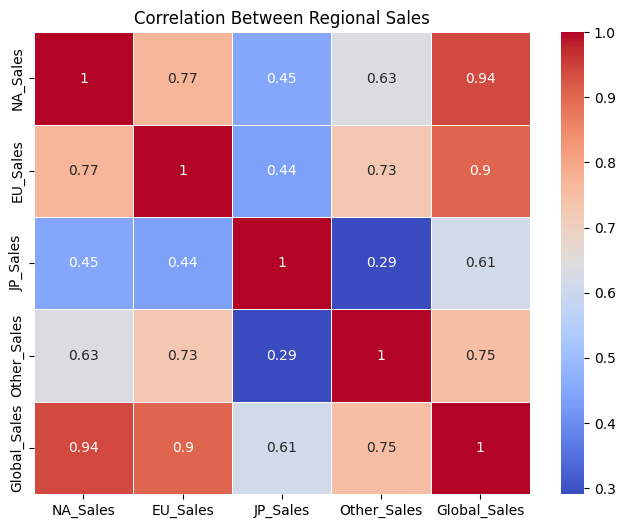

In [21]:
# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Regional Sales')
plt.show()


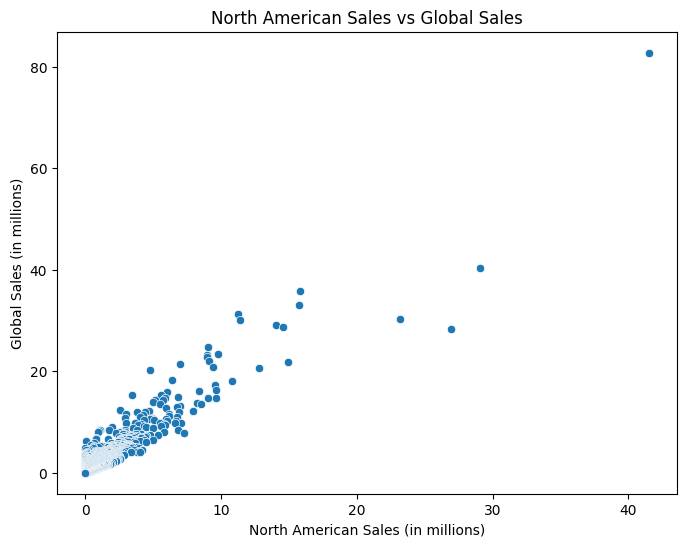

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=df)
plt.title('North American Sales vs Global Sales')
plt.xlabel('North American Sales (in millions)')
plt.ylabel('Global Sales (in millions)')
plt.show()

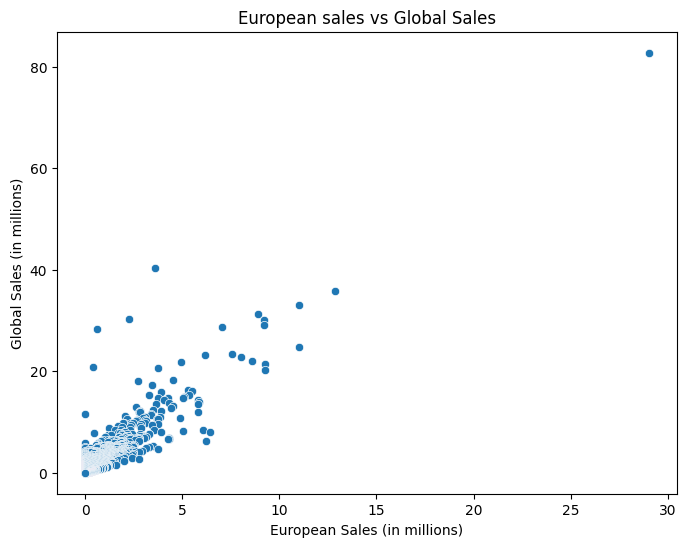

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='EU_Sales', y='Global_Sales', data=df)
plt.title('European sales vs Global Sales')
plt.xlabel('European Sales (in millions)')
plt.ylabel('Global Sales (in millions)')
plt.show()

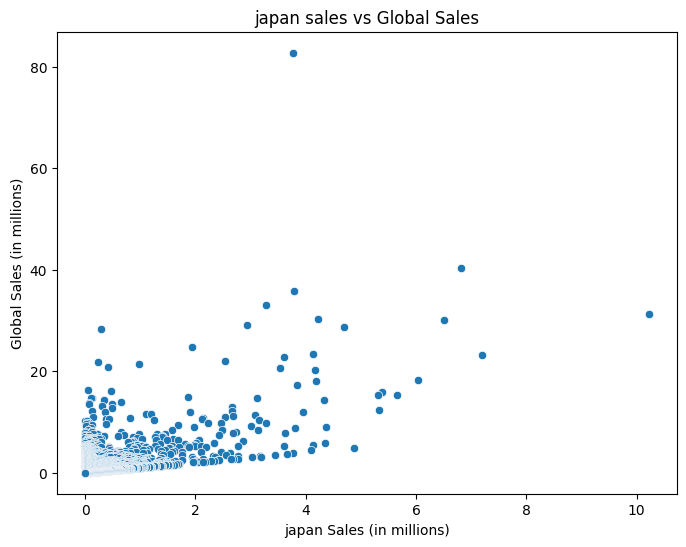

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='JP_Sales', y='Global_Sales', data=df)
plt.title('japan sales vs Global Sales')
plt.xlabel('japan Sales (in millions)')
plt.ylabel('Global Sales (in millions)')
plt.show()

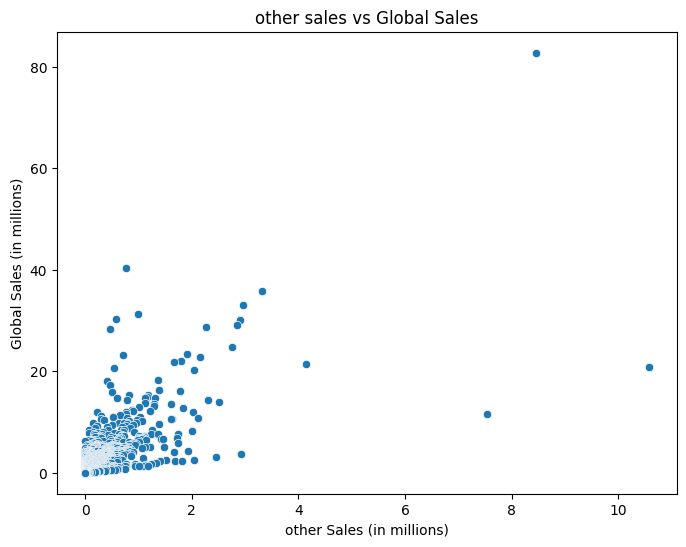

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Other_Sales', y='Global_Sales', data=df)
plt.title('other sales vs Global Sales')
plt.xlabel('other Sales (in millions)')
plt.ylabel('Global Sales (in millions)')
plt.show()

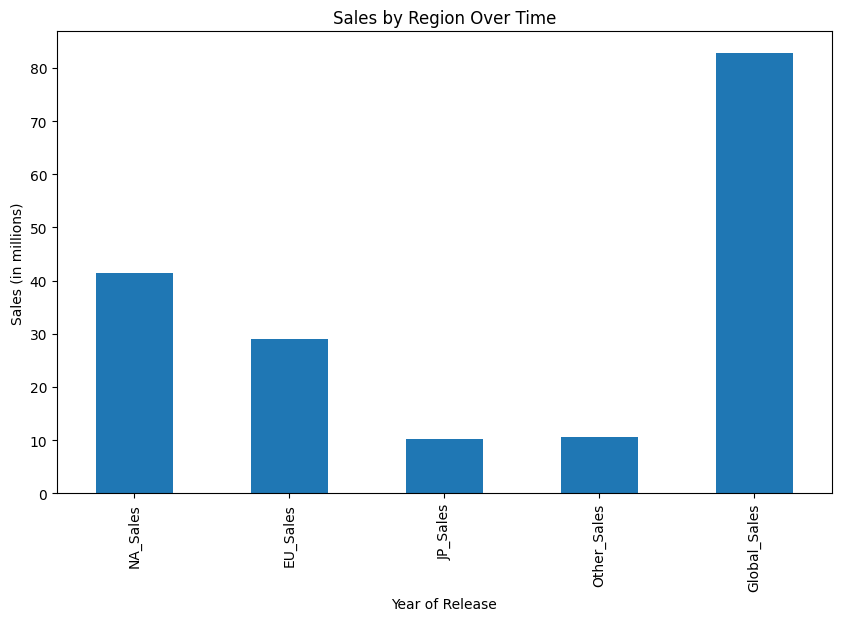

In [26]:
# Plot a stacked bar chart
region_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales by Region Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Sales (in millions)')
plt.show()

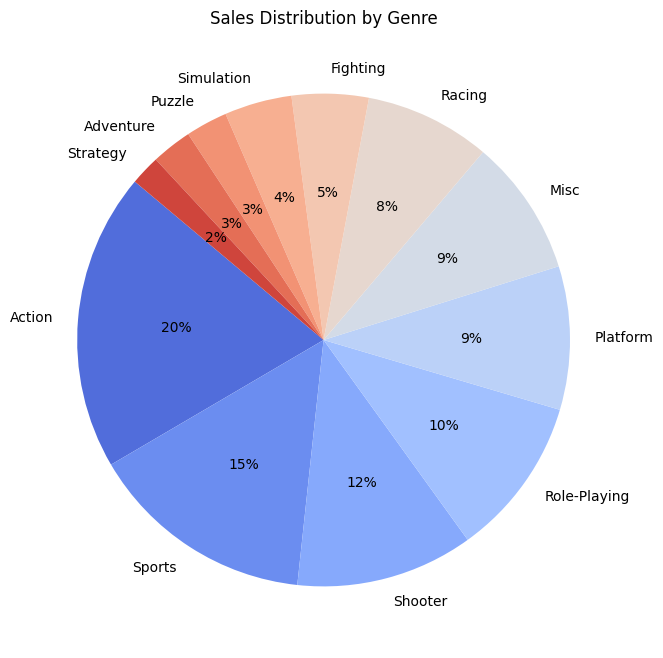

In [27]:

plt.figure(figsize=(8, 8))
plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.f%%', startangle=140, colors=sns.color_palette('coolwarm', len(genre_sales)))
plt.title('Sales Distribution by Genre')
plt.show()


In [28]:
df=df.drop(['Rank'],axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [31]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through all object columns and apply LabelEncoder
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])



In [32]:

print(df.head())

    Name  Platform    Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0  10849        26  2006.0     10        359     41.49     29.02      3.77   
1   9201        11  1985.0      4        359     29.08      3.58      6.81   
2   5493        26  2008.0      6        359     15.85     12.88      3.79   
3  10851        26  2009.0     10        359     15.75     11.01      3.28   
4   7247         5  1996.0      7        359     11.27      8.89     10.22   

   Other_Sales  Global_Sales  
0         8.46         82.74  
1         0.77         40.24  
2         3.31         35.82  
3         2.96         33.00  
4         1.00         31.37  


In [33]:
x=df.drop(['Global_Sales'],axis=1)
y=df['Global_Sales']

In [35]:
import statsmodels.api as sm

In [36]:
X=sm.add_constant(x)


In [37]:
Model=sm.OLS(y,X)
results=Model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.630e+08
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:13:42   Log-Likelihood:                 62494.
No. Observations:               16291   AIC:                        -1.250e+05
Df Residuals:                   16281   BIC:                        -1.249e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0060      0.015      0.405      

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.9999932941877028
Mean Squared Error: 2.868724874738403e-05
